# Geospatial analysis assignment

This document presents the solution for the assignment of the Python for Geospatial Analysis (2020) course.


In [1]:
import rasterio
import bokeh
import urllib.request
import zipfile
import os
import matplotlib as mlp
from rasterio.plot import show
from rasterio.merge import merge
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import gdal
import numpy as np
import ogr, osr
import geopandas as gpd
import pandas as pd
import seaborn as sns
import contextily as ctx
from shapely.geometry import Polygon
import libpysal 
from libpysal import weights
from pysal.explore import esda
from pysal.viz import mapclassify
%matplotlib inline

# Exercise 1.1

Using countries.tif, I search the coordinates where the country 484 (Mexico) is in the complete world map.

In [2]:
Countries = rasterio.open('countries.tif')
{i: dtype for i, dtype in zip(Countries.indexes, Countries.dtypes)}
cinfo = Countries.read(1)

result = np.where(cinfo == 484)
roww = (result[0])
columnss = (result[1])

#print (result[0]) #rows
#print (result[1]) #columns
#print ((cinfo[roww[1]][columnss[1]]) == 484)

#plt.figure(figsize=(14, 14))
#show((Countries, 1), title='Urban 2010', norm=LogNorm(), cmap='hot_r')
#print (len(columnss))

After having the knowledge of the coodinates, the extraction of the population information is done from each coordinate and then added. 

In [3]:
urb2010 = rasterio.open('ssp4urb2010.tif')
infourb2010 = (urb2010.read(1))
urb2020 = rasterio.open('ssp4urb2020.tif')
infourb2020 = (urb2020.read(1))
urb2030 = rasterio.open('ssp4urb2030.tif')
infourb2030 = (urb2030.read(1))
urb2040 = rasterio.open('ssp4urb2040.tif')
infourb2040 = (urb2040.read(1))
urb2050 = rasterio.open('ssp4urb2050.tif')
infourb2050 = (urb2050.read(1))
urb2060 = rasterio.open('ssp4urb2060.tif')
infourb2060 = (urb2060.read(1))
urb2070 = rasterio.open('ssp4urb2070.tif')
infourb2070 = (urb2070.read(1))
urb2080 = rasterio.open('ssp4urb2080.tif')
infourb2080 = (urb2080.read(1))
urb2090 = rasterio.open('ssp4urb2090.tif')
infourb2090 = (urb2090.read(1))
urb2100 = rasterio.open('ssp4urb2100.tif')
infourb2100 = (urb2100.read(1))

tot2010 = rasterio.open('ssp4_2010.tif')
info2010 = (tot2010.read(1))
tot2020 = rasterio.open('ssp4_2020.tif')
info2020 = (tot2020.read(1))
tot2030 = rasterio.open('ssp4_2030.tif')
info2030 = (tot2030.read(1))
tot2040 = rasterio.open('ssp4_2040.tif')
info2040 = (tot2040.read(1))
tot2050 = rasterio.open('ssp4_2050.tif')
info2050 = (tot2050.read(1))
tot2060 = rasterio.open('ssp4_2060.tif')
info2060 = (tot2060.read(1))
tot2070 = rasterio.open('ssp4_2070.tif')
info2070 = (tot2070.read(1))
tot2080 = rasterio.open('ssp4_2080.tif')
info2080 = (tot2080.read(1))
tot2090 = rasterio.open('ssp4_2090.tif')
info2090 = (tot2090.read(1))
tot2100 = rasterio.open('ssp4_2100.tif')
info2100 = (tot2100.read(1))

popurb_2010 = [0]
for i in range(0, len(roww)):
    popurb_2010 += infourb2010[roww[i],columnss[i]]
    #print (infos[roww[i],columnss[i]])

popurb_2020 = [0]
for i in range(0, len(roww)):
    popurb_2020 += infourb2020[roww[i],columnss[i]]

popurb_2030 = [0]
for i in range(0, len(roww)):
    popurb_2030 += infourb2030[roww[i],columnss[i]]

popurb_2040 = [0]
for i in range(0, len(roww)):
    popurb_2040 += infourb2040[roww[i],columnss[i]]

popurb_2050 = [0]
for i in range(0, len(roww)):
    popurb_2050 += infourb2050[roww[i],columnss[i]]

popurb_2060 = [0]
for i in range(0, len(roww)):
    popurb_2060 += infourb2060[roww[i],columnss[i]]

popurb_2070 = [0]
for i in range(0, len(roww)):
    popurb_2070 += infourb2070[roww[i],columnss[i]]

popurb_2080 = [0]
for i in range(0, len(roww)):
    popurb_2080 += infourb2080[roww[i],columnss[i]]

popurb_2090 = [0]
for i in range(0, len(roww)):
    popurb_2090 += infourb2090[roww[i],columnss[i]]

popurb_2100 = [0]
for i in range(0, len(roww)):
    popurb_2100 += infourb2100[roww[i],columnss[i]]
    
poptot_2010 = [0]
for i in range(0, len(roww)):
    poptot_2010 += info2010[roww[i],columnss[i]]
    #print (infos[roww[i],columnss[i]])

poptot_2020 = [0]
for i in range(0, len(roww)):
    poptot_2020 += info2020[roww[i],columnss[i]]

poptot_2030 = [0]
for i in range(0, len(roww)):
    poptot_2030 += info2030[roww[i],columnss[i]]

poptot_2040 = [0]
for i in range(0, len(roww)):
    poptot_2040 += info2040[roww[i],columnss[i]]

poptot_2050 = [0]
for i in range(0, len(roww)):
    poptot_2050 += info2050[roww[i],columnss[i]]

poptot_2060 = [0]
for i in range(0, len(roww)):
    poptot_2060 += info2060[roww[i],columnss[i]]

poptot_2070 = [0]
for i in range(0, len(roww)):
    poptot_2070 += info2070[roww[i],columnss[i]]

poptot_2080 = [0]
for i in range(0, len(roww)):
    poptot_2080 += info2080[roww[i],columnss[i]]

poptot_2090 = [0]
for i in range(0, len(roww)):
    poptot_2090 += info2090[roww[i],columnss[i]]

poptot_2100 = [0]
for i in range(0, len(roww)):
    poptot_2100 += info2100[roww[i],columnss[i]]
    
#print (popurb_2010)
#print (popurb_2020)
#print (popurb_2030)
#print (popurb_2040)
#print (popurb_2050)
#print (popurb_2060)
#print (popurb_2070)
#print (popurb_2080)
#print (popurb_2090)
#print (popurb_2100)

#print (poptot_2010)
#print (poptot_2020)
#print (poptot_2030)
#print (poptot_2040)
#print (poptot_2050)
#print (poptot_2060)
#print (poptot_2070)
#print (poptot_2080)
#print (poptot_2090)
#print (poptot_2100)


The total for each year is now plotted:

Text(0.5, 1.0, 'Mexican Population Projection Grid for SSP4 (Inequality) \n Urban Population in Blue, Total Population in Green')

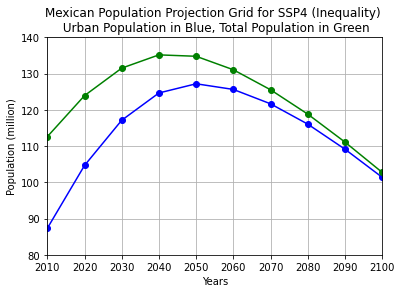

In [4]:
year = [2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
UrbPop = [popurb_2010/1e6, popurb_2020/1e6, popurb_2030/1e6, popurb_2040/1e6,
         popurb_2050/1e6, popurb_2060/1e6, popurb_2070/1e6, popurb_2080/1e6,
         popurb_2090/1e6, popurb_2100/1e6]

TotPop = [poptot_2010/1e6, poptot_2020/1e6, poptot_2030/1e6, poptot_2040/1e6,
         poptot_2050/1e6, poptot_2060/1e6, poptot_2070/1e6, poptot_2080/1e6,
         poptot_2090/1e6, poptot_2100/1e6]

plt.plot(year, UrbPop, 'bo', year, UrbPop, 'b',year, TotPop, 'go', year, TotPop, 'g')
plt.axis([2010, 2100, 80, 140])
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Population (million)')
plt.title('Mexican Population Projection Grid for SSP4 (Inequality) \n Urban Population in Blue, Total Population in Green')


# Exercise 1.2

In order to get the cells with population reduction, let's do some raster algebra, and then to get an array with the information of the cells with reduction, the other cells without reduction will become 0.

In [6]:
# If the population is reduced, the result has to be positive
RasterRedu = info2010 - info2100

#print (len(RasterRedu))
#print (len(RasterRedu[0]))

# Now I make an array with the information needed from RasterRedu
arrayRedu = np.zeros((len(RasterRedu),len(RasterRedu[0])))
for i in range(0, len(RasterRedu)):
    for j in range(0, len(RasterRedu[0])):
        if RasterRedu[i][j] <= 0:
            arrayRedu[i][j] = 0
        else:
            arrayRedu[i][j] = RasterRedu[i][j]

#print (len(arrayRedu))
#print (len(arrayRedu[0]))
#print (RasterRedu[1][2])

Having an array with the raster cells information, we can create a new raster with that information.

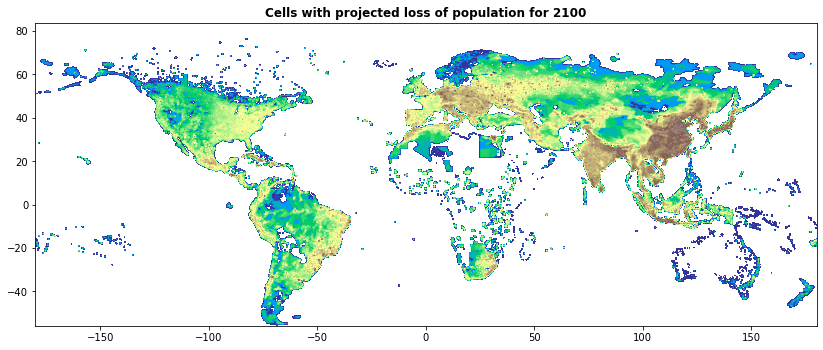

In [7]:
# This function will convert the array to a raster
def array2raster(rasterfn,newRasterfn,array):
    raster = gdal.Open(rasterfn)
    geotransform = raster.GetGeoTransform()
    originX = geotransform[0]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    pixelHeight = geotransform[5]
    cols = raster.RasterXSize
    rows = raster.RasterYSize
    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Float32)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromWkt(raster.GetProjectionRef())
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

# I select the file to put the new array, which is a copy from the original raster
rasterfn = 'ssp4_2100.tif'
newRasterfn = 'ssp4_2100C.tif'
rasterArray = arrayRedu

array2raster(rasterfn,newRasterfn,rasterArray)

prueba = rasterio.open('ssp4_2100C.tif')
plt.figure(figsize=(14, 14))
show((prueba, 1), title='Cells with projected loss of population for 2100', norm=LogNorm(), cmap='terrain')

# Exercise 2.1

The first step is to open the shape file and the .csv file. Then I change the name of the coulumn in the shape file, so both shape and .csv files have the same column name to perform the left join.

In [8]:
#Set file name 
fp = "ne_110m_admin_0_countries.shp"
fq = "under5mortality.csv"

# Read file using gpd.read_file() 
shapedata = gpd.read_file(fp)
UnderMort_data = gpd.read_file(fq)

print(shapedata.info())

# Change the name of ISO_A3 to ISO 
shapedata = shapedata.rename(columns={'ISO_A3': 'ISO'})

print(shapedata.info())

print(UnderMort_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   featurecla  177 non-null    object  
 1   scalerank   177 non-null    int64   
 2   LABELRANK   177 non-null    int64   
 3   SOVEREIGNT  177 non-null    object  
 4   SOV_A3      177 non-null    object  
 5   ADM0_DIF    177 non-null    int64   
 6   LEVEL       177 non-null    int64   
 7   TYPE        177 non-null    object  
 8   ADMIN       177 non-null    object  
 9   ADM0_A3     177 non-null    object  
 10  GEOU_DIF    177 non-null    int64   
 11  GEOUNIT     177 non-null    object  
 12  GU_A3       177 non-null    object  
 13  SU_DIF      177 non-null    int64   
 14  SUBUNIT     177 non-null    object  
 15  SU_A3       177 non-null    object  
 16  BRK_DIFF    177 non-null    int64   
 17  NAME        177 non-null    object  
 18  NAME_LONG   177 non-null    object  
 19  

Having both files with the same column name (ISO), I perform the left join.

In [9]:
Newset_data = pd.merge(shapedata, UnderMort_data, on='ISO', how='left')

Newset_data = Newset_data.rename(columns={'geometry_x': 'geometry'}).set_geometry('geometry')

print(Newset_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 99 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   featurecla      177 non-null    object  
 1   scalerank       177 non-null    int64   
 2   LABELRANK       177 non-null    int64   
 3   SOVEREIGNT      177 non-null    object  
 4   SOV_A3          177 non-null    object  
 5   ADM0_DIF        177 non-null    int64   
 6   LEVEL           177 non-null    int64   
 7   TYPE            177 non-null    object  
 8   ADMIN           177 non-null    object  
 9   ADM0_A3         177 non-null    object  
 10  GEOU_DIF        177 non-null    int64   
 11  GEOUNIT         177 non-null    object  
 12  GU_A3           177 non-null    object  
 13  SU_DIF          177 non-null    int64   
 14  SUBUNIT         177 non-null    object  
 15  SU_A3           177 non-null    object  
 16  BRK_DIFF        177 non-null    int64   
 17  NAME    

# Exercise 2.2

The first step is to create the connection matrix based on border neighborhood.

In [10]:
w_world = weights.Queen.from_dataframe(Newset_data)
pd.DataFrame(w_world.full()[0], 
             index=Newset_data['ISO'],
             columns=Newset_data['ISO'],
            ).astype(int)


#f, axs = plt.subplots(2, 1, figsize=(16, 16))

#Newset_data.plot(color='k', ax=axs[0], 
#        edgecolor='w', linewidth=0.5)
#w_world.plot(Newset_data, ax=axs[0], color='red')
#axs[0].set_title('Queen weights')

C:\Users\RX85IF\Anaconda3\envs\geoanalysis\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 25 disconnected components.
 There are 21 islands with ids: 0, 19, 20, 22, 23, 45, 46, 47, 78, 89, 134, 135, 136, 137, 138, 140, 144, 147, 155, 159, 175.
  warnings.warn(message)


ISO,FJI,TZA,ESH,CAN,USA,KAZ,UZB,PNG,IDN,ARG,...,-99,UGA,RWA,BIH,MKD,SRB,MNE,-99,TTO,SSD
ISO,,,,,,,,,,,,,,,,,,,,,
FJI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TZA,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
ESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
MNE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
-99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


Now I can compute the Moran I for child mortality

In [12]:
# It is necessary to convert all "NaN" to 0, and then from dtype "object" to "numeric"
Newset_data.ChildMortality[pd.isnull(Newset_data.ChildMortality)] = 0
Newset_data["ChildMortality"] = pd.to_numeric(Newset_data["ChildMortality"])
#print (Newset_data.ChildMortality)

# With the above changes, the Moran I can be computed
moran = esda.Moran(Newset_data['ChildMortality'], w_world)
moran.I

C:\Users\RX85IF\Anaconda3\envs\geoanalysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.7095772721722277